In [1]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import cv2
from IPython.display import display, Image
import os

Press 'Space' to capture the photo or 'ESC' to exit.
Photo saved to captured_image.jpg


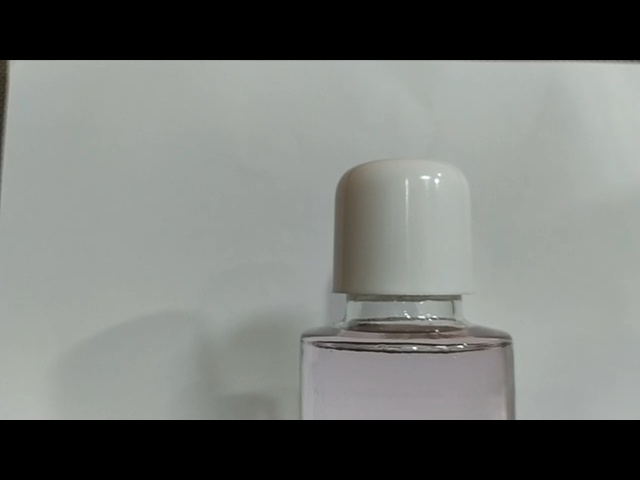

In [4]:
def capture_photo(filename='photo.jpg'):
    """
    Captures an image from the webcam and saves it to a file.
    
    Args:
        filename (str): The file path where the image will be saved.
        
    Returns:
        str: The filename of the captured photo.
    """
    # Open webcam
    cap = cv2.VideoCapture(1)

    if not cap.isOpened():
        raise IOError("Cannot access the webcam")

    print("Press 'Space' to capture the photo or 'ESC' to exit.")

    while True:
        # Read frame from the webcam
        ret, frame = cap.read()
        if not ret:
            raise IOError("Failed to read from the webcam")

        # Show the live video feed
        cv2.imshow("Webcam - Press Space to Capture", frame)

        # Wait for key press
        key = cv2.waitKey(1)

        if key == 27:  # ESC key to exit
            print("Exiting without saving...")
            break
        elif key == 32:  # Space key to capture photo
            cv2.imwrite(filename, frame)  # Save the captured image
            print(f"Photo saved to {filename}")
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

    # Return the filename
    return filename

# Usage
try:
    filename = capture_photo("captured_image.jpg")
    display(Image(filename))  # Display the captured image in Jupyter
except Exception as e:
    print(f"Error: {e}")

In [7]:
img = cv2.imread(filename)

resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

scaled_image.shape

np.expand_dims(scaled_image, 0).shape

yhat = model.predict(np.expand_dims(scaled_image, 0))

NameError: name 'IMAGE_SIZE' is not defined

In [ ]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')